In [4]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

dataset = pd.read_csv("C:/Users/M.Naufal/Desktop/testing/test.csv")  

dataset.shape  
dataset.head()  


,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,186,187,188,189,190,191,192,193,194,class
0,6250,-18.533161,-17.300008,-17.946638,-18.778949,-16.717009,-15.957606,-16.168395,-15.031891,-15.520220,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NEU
1,3487,-16.045252,-13.502484,-9.362442,-6.484350,-8.684005,-11.524328,-9.506710,-10.628959,-12.290954,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ANG
2,487,-18.074761,-18.489622,-17.979468,-17.089028,-17.256001,-16.562114,-15.466078,-17.455484,-16.573877,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DIS
3,2381,-14.989205,-12.663454,-12.758900,-12.473405,-11.537112,-11.008978,-11.764417,-13.219886,-14.947768,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DIS
4,2689,-19.691096,-18.994305,-19.307949,-18.766517,-18.449793,-17.932033,-16.730863,-16.111133,-17.220508,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DIS


In [5]:
X = dataset.drop('class', axis=1)  
y = dataset['class']

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)  

from sklearn.tree import DecisionTreeClassifier  
classifier = DecisionTreeClassifier()  
classifier.fit(X_train, y_train)  

y_pred = classifier.predict(X_test) 


In [10]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=37)  
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=37, p=2,
           weights='uniform')

In [11]:
y_pred = classifier.predict(X_test)  
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

[[61 57 41 58 25 24]
 [27 88 42 26 20 44]
 [20 55 40 48 39 33]
 [39 40 42 75 35 33]
 [12 45 34 52 34 35]
 [26 59 48 39 38 55]]
             precision    recall  f1-score   support

        ANG       0.33      0.23      0.27       266
        DIS       0.26      0.36      0.30       247
        FEA       0.16      0.17      0.17       235
        HAP       0.25      0.28      0.27       264
        NEU       0.18      0.16      0.17       212
        SAD       0.25      0.21      0.22       265

avg / total       0.24      0.24      0.24      1489



Text(0,0.5,'Mean Error')

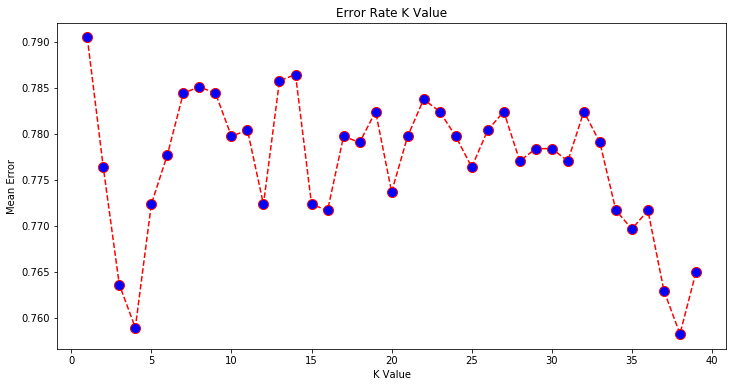

In [9]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')